In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
###Variables and inputs:
a = 0.9 # Joule heating efficiency [-]
C = 1000 # specific heat capacity [J*kg^(-1)*K(-1)]
delta = -1*10**7 # non-zero boundary flux [W*m^(-2)]
epsilon = 100 # magnitude of imposed electric field [V*m^(-1)]
sigma_c = 5*10**5 # isotropic electrical conductivity [S*m^(-1)]
J = sigma_c*epsilon # current density [A*m^(-2)]
K = 400 # isotropic thermal conductivity [W*m^(-1)*K^(-1)]
L = 0.01 # domain length [m]
M = {2, 10, 20} # number of domain discretizations [-]
M1 = 2
M2 = 10
M3 = 20
rho = 6000 # material density [kg*m^(-3)]
theta_0 = 300 # initial temperature [K]
T = 1 # simulation time [s]
dt = 10**(-5) # time step size [s]
Nt = T/dt # number of time discretizations [-]
dx1 = L/M1
dx2 = L/M2
dx3 = L/M3
x = np.linspace(0, L, 1000)
x1 = np.linspace(0, L, M1+1)
x2 = np.linspace(0, L, M2+1)
x3 = np.linspace(0, L, M3+1)

# Initial conditions:

In [ ]:
#for M1:
theta_0_x1_t1 =np.empty((len(x1),1))
theta_0_x1_t2 =np.empty((len(x1),1))
theta_0_x1_t3 =np.empty((len(x1),1))
theta_0_x1_t4 =np.empty((len(x1),1))
theta_0_x1_t5 =np.empty((len(x1),1))
theta_0_x1_ss =np.empty((len(x1),1))
for i in range(len(x1)):
    theta_0_x1_t1[i] = theta_0
    theta_0_x1_t2[i] = theta_0
    theta_0_x1_t3[i] = theta_0
    theta_0_x1_t4[i] = theta_0
    theta_0_x1_t5[i] = theta_0
    
#for M2:
theta_0_x2_t1 =np.empty((len(x2),1))
theta_0_x2_t2 =np.empty((len(x2),1))
theta_0_x2_t3 =np.empty((len(x2),1))
theta_0_x2_t4 =np.empty((len(x2),1))
theta_0_x2_t5 =np.empty((len(x2),1))
theta_0_x2_ss =np.empty((len(x2),1))
for i in range(len(x2)):
    theta_0_x2_t1[i] = theta_0
    theta_0_x2_t2[i] = theta_0
    theta_0_x2_t3[i] = theta_0
    theta_0_x2_t4[i] = theta_0
    theta_0_x2_t5[i] = theta_0
        
#for M3:
theta_0_x3_t1 =np.empty((len(x3),1))
theta_0_x3_t2 =np.empty((len(x3),1))
theta_0_x3_t3 =np.empty((len(x3),1))
theta_0_x3_t4 =np.empty((len(x3),1))
theta_0_x3_t5 =np.empty((len(x3),1))
theta_0_x3_ss =np.empty((len(x3),1))
for i in range(len(x3)):
    theta_0_x3_t1[i] = theta_0
    theta_0_x3_t2[i] = theta_0
    theta_0_x3_t3[i] = theta_0
    theta_0_x3_t4[i] = theta_0
    theta_0_x3_t5[i] = theta_0

# 2nd derivative helper matrix

In [ ]:
#for m1:
D2_x1 = np.zeros((len(theta_0_x1_t1),len(theta_0_x1_t1)))
k=-1
h=0
l=1
#c1 = dt*K/(rho*C*(dx1)**2)
#c2 = -2*dt*K/(rho*C*(dx1)**2)
#c3=c1
c1=1
c2=-2
c3=1
for i in range(len(theta_0_x1_t1)):
    for j in range(len(theta_0_x1_t1)): #D[i,j] = D[column, row]
        D2_x1[i,k] = c1
        if i!=len(theta_0_x1_t1)-1:
            D2_x1[i,l] = c3            
        D2_x1[i,h] = c2
    k+=1
    h+=1
    l+=1
    
#for m2:
D2_x2 = np.zeros((len(theta_0_x2_t1),len(theta_0_x2_t1)))
k=-1
h=0
l=1
#c1 = dt*K/(rho*C*(dx1)**2)
#c2 = -2*dt*K/(rho*C*(dx1)**2)
#c3=c1
c1=1
c2=-2
c3=1
for i in range(len(theta_0_x2_t1)):
    for j in range(len(theta_0_x2_t1)): #D[i,j] = D[column, row]
        D2_x2[i,k] = c1
        if i!=len(theta_0_x2_t1)-1:
            D2_x2[i,l] = c3            
        D2_x2[i,h] = c2
    k+=1
    h+=1
    l+=1

#for m3:
D2_x3 = np.zeros((len(theta_0_x3_t1),len(theta_0_x3_t1)))
k=-1
h=0
l=1
c1=1
c2=-2
c3=1
for i in range(len(theta_0_x3_t1)):
    for j in range(len(theta_0_x3_t1)): #D[i,j] = D[column, row]
        D2_x3[i,k] = c1
        if i!=len(theta_0_x3_t1)-1:
            D2_x3[i,l] = c3            
        D2_x3[i,h] = c2
    k+=1
    h+=1
    l+=1

## Plot for Case A & m1 (M=2)

In [ ]:
#for m1:
#for-loop over time:
#t1=1/5*T;t2=2/5*T and so on
theta_x1_t1=theta_0_x1_t1
theta_x1_t2=theta_0_x1_t2
theta_x1_t3=theta_0_x1_t3
theta_x1_t4=theta_0_x1_t4
theta_x1_t5=theta_0_x1_t5
theta_x1_ss=theta_0_x1_ss
for i in range(round(Nt)):
    theta_new_x1_t1 = theta_x1_t1 + (K/(rho*C))*(1/5)*dt/(dx1**2)*(D2_x1.dot(theta_x1_t1)+(a*J*epsilon*dx1**2/K))
    theta_new_x1_t1[0]=theta_0
    theta_new_x1_t1[M1]=theta_0
    theta_x1_t1 = theta_new_x1_t1
    
    theta_new_x1_t2 = theta_x1_t2 + (K/(rho*C))*(2/5)*dt/(dx1**2)*(D2_x1.dot(theta_x1_t2)+(a*J*epsilon*dx1**2/K))
    theta_new_x1_t2[0]=theta_0
    theta_new_x1_t2[M1]=theta_0
    theta_x1_t2 = theta_new_x1_t2
    
    theta_new_x1_t3 = theta_x1_t3 + (K/(rho*C))*(3/5)*dt/(dx1**2)*(D2_x1.dot(theta_x1_t3)+(a*J*epsilon*dx1**2/K))
    theta_new_x1_t3[0]=theta_0
    theta_new_x1_t3[M1]=theta_0
    theta_x1_t3 = theta_new_x1_t3
    
    theta_new_x1_t4 = theta_x1_t4 + (K/(rho*C))*(4/5)*dt/(dx1**2)*(D2_x1.dot(theta_x1_t4)+(a*J*epsilon*dx1**2/K))
    theta_new_x1_t4[0]=theta_0
    theta_new_x1_t4[M1]=theta_0
    theta_x1_t4 = theta_new_x1_t4
    
    theta_new_x1_t5 = theta_x1_t5 + (K/(rho*C))*(5/5)*dt/(dx1**2)*(D2_x1.dot(theta_x1_t5)+(a*J*epsilon*dx1**2/K))
    theta_new_x1_t5[0]=theta_0
    theta_new_x1_t5[M1]=theta_0
    theta_x1_t5 = theta_new_x1_t5

#steady-state sol:
theta_x1_ss=-(a/(2*K))*J*epsilon*(x)**2+(a/(2*K))*J*epsilon*L*x+theta_0

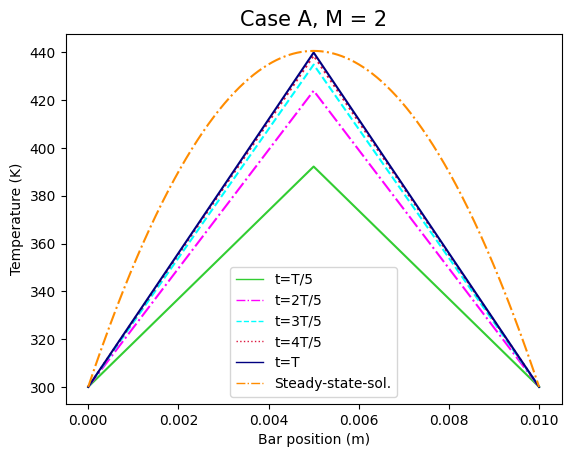

In [ ]:
plt.title('Case A, M = 2', fontsize = 15)
plt.xlabel('Bar position (m)', fontsize = 10)
plt.ylabel('Temperature (K)',fontsize = 10)
plt.plot(x1, theta_new_x1_t1, c='limegreen', linestyle='solid')
plt.plot(x1, theta_new_x1_t2, c='magenta', linestyle='dashdot')
plt.plot(x1, theta_new_x1_t3, c='cyan', linestyle='--')
plt.plot(x1, theta_new_x1_t4, c='crimson', linestyle='dotted')
plt.plot(x1, theta_new_x1_t5, c='navy', linestyle='solid')
plt.plot(x, theta_x1_ss, c='darkorange', linestyle='dashdot')
plt.plot([],[], c='limegreen', linestyle = 'solid', label= 't=T/5', linewidth=1)
plt.plot([],[], c='magenta', linestyle = 'dashdot', label= 't=2T/5', linewidth=1)
plt.plot([],[], c='cyan', linestyle = '--', label= 't=3T/5', linewidth=1)
plt.plot([],[], c='crimson', linestyle = 'dotted', label= 't=4T/5', linewidth=1)
plt.plot([],[], c='navy', linestyle = 'solid', label= 't=T', linewidth=1)
plt.plot([],[], c='darkorange', linestyle = 'dashdot', label= 'Steady-state-sol.', linewidth=1)
plt.legend()


## Plot for Case A & m2 (M=10)

In [ ]:
#for m2:
#for-loop over time:
#t1=1/5*T;t2=2/5*T and so on
theta_x2_t1=theta_0_x2_t1
theta_x2_t2=theta_0_x2_t2
theta_x2_t3=theta_0_x2_t3
theta_x2_t4=theta_0_x2_t4
theta_x2_t5=theta_0_x2_t5
theta_x2_ss=theta_0_x2_ss
for i in range(round(Nt)):
    theta_new_x2_t1 = theta_x2_t1 + (K/(rho*C))*(1/5)*dt/(dx2**2)*(D2_x2.dot(theta_x2_t1)+(a*J*epsilon*dx2**2/K))
    theta_new_x2_t1[0]=theta_0
    theta_new_x2_t1[M2]=theta_0
    theta_x2_t1 = theta_new_x2_t1
    
    theta_new_x2_t2 = theta_x2_t2 + (K/(rho*C))*(2/5)*dt/(dx2**2)*(D2_x2.dot(theta_x2_t2)+(a*J*epsilon*dx2**2/K))
    theta_new_x2_t2[0]=theta_0
    theta_new_x2_t2[M2]=theta_0
    theta_x2_t2 = theta_new_x2_t2
    
    theta_new_x2_t3 = theta_x2_t3 + (K/(rho*C))*(3/5)*dt/(dx2**2)*(D2_x2.dot(theta_x2_t3)+(a*J*epsilon*dx2**2/K))
    theta_new_x2_t3[0]=theta_0
    theta_new_x2_t3[M2]=theta_0
    theta_x2_t3 = theta_new_x2_t3
    
    theta_new_x2_t4 = theta_x2_t4 + (K/(rho*C))*(4/5)*dt/(dx2**2)*(D2_x2.dot(theta_x2_t4)+(a*J*epsilon*dx2**2/K))
    theta_new_x2_t4[0]=theta_0
    theta_new_x2_t4[M2]=theta_0
    theta_x2_t4 = theta_new_x2_t4
    
    theta_new_x2_t5 = theta_x2_t5 + (K/(rho*C))*(5/5)*dt/(dx2**2)*(D2_x2.dot(theta_x2_t5)+(a*J*epsilon*dx2**2/K))
    theta_new_x2_t5[0]=theta_0
    theta_new_x2_t5[M2]=theta_0
    theta_x2_t5 = theta_new_x2_t5

#steady-state sol:
theta_x2_ss=-(a/(2*K))*J*epsilon*(x)**2+(a/(2*K))*J*epsilon*L*x+theta_0

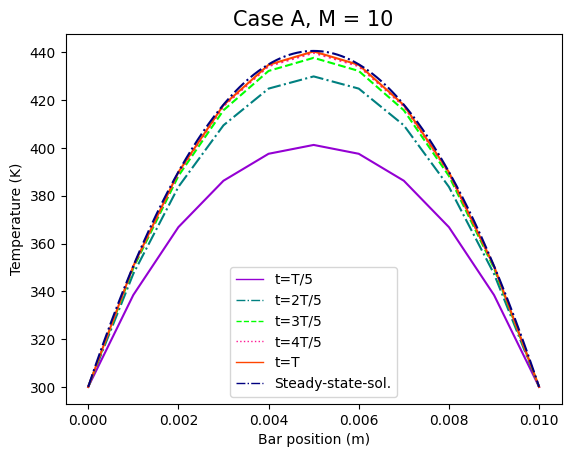

In [ ]:
plt.title('Case A, M = 10', fontsize = 15)
plt.xlabel('Bar position (m)', fontsize = 10)
plt.ylabel('Temperature (K)',fontsize = 10)
plt.plot(x2, theta_new_x2_t1, c='darkviolet', linestyle='solid')
plt.plot(x2, theta_new_x2_t2, c='teal', linestyle='dashdot')
plt.plot(x2, theta_new_x2_t3, c='lime', linestyle='--')
plt.plot(x2, theta_new_x2_t4, c='deeppink', linestyle='dotted')
plt.plot(x2, theta_new_x2_t5, c='orangered', linestyle='solid')
plt.plot(x, theta_x2_ss, c='navy', linestyle='dashdot')
plt.plot([],[], c='darkviolet', linestyle = 'solid', label= 't=T/5', linewidth=1)
plt.plot([],[], c='teal', linestyle = 'dashdot', label= 't=2T/5', linewidth=1)
plt.plot([],[], c='lime', linestyle = '--', label= 't=3T/5', linewidth=1)
plt.plot([],[], c='deeppink', linestyle = 'dotted', label= 't=4T/5', linewidth=1)
plt.plot([],[], c='orangered', linestyle = 'solid', label= 't=T', linewidth=1)
plt.plot([],[], c='navy', linestyle = 'dashdot', label= 'Steady-state-sol.', linewidth=1)
plt.legend()

# Plot for Case A & m3 (M=20)

In [ ]:
#for m3:
#for-loop over time:
#t1=1/5*T;t2=2/5*T and so on
theta_x3_t1=theta_0_x3_t1
theta_x3_t2=theta_0_x3_t2
theta_x3_t3=theta_0_x3_t3
theta_x3_t4=theta_0_x3_t4
theta_x3_t5=theta_0_x3_t5
theta_x3_ss=theta_0_x3_ss
for i in range(round(Nt)):
    theta_new_x3_t1 = theta_x3_t1 + (K/(rho*C))*(1/5)*dt/(dx3**2)*(D2_x3.dot(theta_x3_t1)+(a*J*epsilon*dx3**2/K))
    theta_new_x3_t1[0]=theta_0
    #theta_new_x3_t1[M3]=theta_0
    theta_x3_t1 = theta_new_x3_t1
    
    theta_new_x3_t2 = theta_x3_t2 + (K/(rho*C))*(2/5)*dt/(dx3**2)*(D2_x3.dot(theta_x3_t2)+(a*J*epsilon*dx3**2/K))
    theta_new_x3_t2[0]=theta_0
    theta_new_x3_t2[M3]=theta_0
    theta_x3_t2 = theta_new_x3_t2
    
    theta_new_x3_t3 = theta_x3_t3 + (K/(rho*C))*(3/5)*dt/(dx3**2)*(D2_x3.dot(theta_x3_t3)+(a*J*epsilon*dx3**2/K))
    theta_new_x3_t3[0]=theta_0
    theta_new_x3_t3[M3]=theta_0
    theta_x3_t3 = theta_new_x3_t3
    
    theta_new_x3_t4 = theta_x3_t4 + (K/(rho*C))*(4/5)*dt/(dx3**2)*(D2_x3.dot(theta_x3_t4)+(a*J*epsilon*dx3**2/K))
    theta_new_x3_t4[0]=theta_0
    theta_new_x3_t4[M3]=theta_0
    theta_x3_t4 = theta_new_x3_t4
    
    theta_new_x3_t5 = theta_x3_t5 + (K/(rho*C))*(5/5)*dt/(dx3**2)*(D2_x3.dot(theta_x3_t5)+(a*J*epsilon*dx3**2/K))
    theta_new_x3_t5[0]=theta_0
    theta_new_x3_t5[M3]=theta_0
    theta_x3_t5 = theta_new_x3_t5

#steady-state sol:
theta_x3_ss=-(a/(2*K))*J*epsilon*(x)**2+(a/(2*K))*J*epsilon*L*x+theta_0

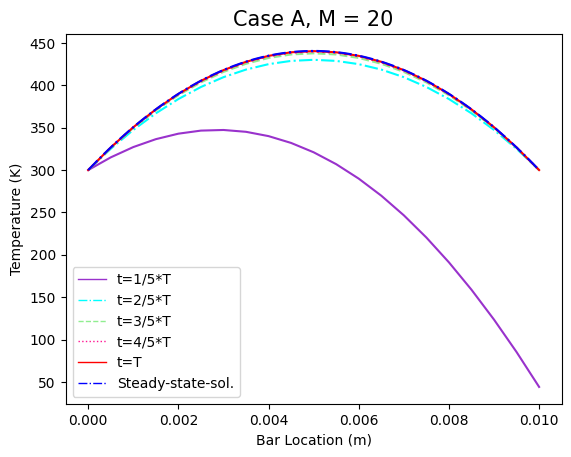

In [ ]:
plt.title('Case A, M = 20',fontsize = 15)
plt.xlabel('Bar Location (m)',fontsize = 10)
plt.ylabel('Temperature (K)',fontsize = 10)
plt.plot(x3, theta_new_x3_t1, c='darkorchid', linestyle='solid')
plt.plot(x3, theta_new_x3_t2, c='cyan', linestyle='dashdot')
plt.plot(x3, theta_new_x3_t3, c='lightgreen', linestyle='--')
plt.plot(x3, theta_new_x3_t4, c='deeppink', linestyle='dotted')
plt.plot(x3, theta_new_x3_t5, c='red', linestyle='solid')
plt.plot(x, theta_x3_ss, c='blue', linestyle='dashdot')
plt.plot([],[], c='darkorchid', linestyle = 'solid', label= 't=1/5*T', linewidth=1)
plt.plot([],[], c='cyan', linestyle = 'dashdot', label= 't=2/5*T', linewidth=1)
plt.plot([],[], c='lightgreen', linestyle = '--', label= 't=3/5*T', linewidth=1)
plt.plot([],[], c='deeppink', linestyle = 'dotted', label= 't=4/5*T', linewidth=1)
plt.plot([],[], c='red', linestyle = 'solid', label= 't=T', linewidth=1)
plt.plot([],[], c='blue', linestyle = 'dashdot', label= 'Steady-state-sol.', linewidth=1)
plt.legend()

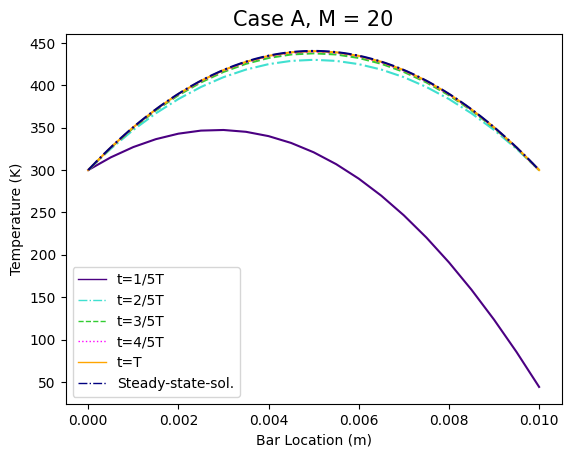

In [ ]:
plt.title('Case A, M = 20',fontsize = 15)
plt.xlabel('Bar Location (m)',fontsize = 10)
plt.ylabel('Temperature (K)',fontsize = 10)
plt.plot(x3, theta_new_x3_t1, c='indigo', linestyle='solid')
plt.plot(x3, theta_new_x3_t2, c='turquoise', linestyle='dashdot')
plt.plot(x3, theta_new_x3_t3, c='limegreen', linestyle='--')
plt.plot(x3, theta_new_x3_t4, c='fuchsia', linestyle='dotted')
plt.plot(x3, theta_new_x3_t5, c='orange', linestyle='solid')
plt.plot(x, theta_x3_ss, c='navy', linestyle='dashdot')
plt.plot([],[], c='indigo', linestyle = 'solid', label= 't=1/5T', linewidth=1)
plt.plot([],[], c='turquoise', linestyle = 'dashdot', label= 't=2/5T', linewidth=1)
plt.plot([],[], c='limegreen', linestyle = '--', label= 't=3/5T', linewidth=1)
plt.plot([],[], c='fuchsia', linestyle = 'dotted', label= 't=4/5T', linewidth=1)
plt.plot([],[], c='orange', linestyle = 'solid', label= 't=T', linewidth=1)
plt.plot([],[], c='navy', linestyle = 'dashdot', label= 'Steady-state-sol.', linewidth=1)
plt.legend()